# Ordinary Least Squares

## Basic Idea

For modeling linear relationships between one or more predictors (continuous or categorical) and a continuous response variable.

Good fit requires a truly linear relationship; sometimes a logarithmic or similar linear transform (Box-cox, sqrt, inverse, etc.) can be applied to yield a linear relationship.

Model is a linear combination of the predictors; e.g. `y = B_0 + B_1 * x_1 + B_2 * x_2 ...`

Beta coefficients are trained by a simple LS method (sum of squared difference between actual y and modeled y at each observation)

Closed form solution is `B_hat = (X'X)^-1 * X'Y`

## Considerations

- Residual plot should appear uniformly random distributed (patterns in resuiduals suggest nonlinear data)
- Following assumptions should be considered:
    - Normality
    - Homoscedasticity (constant sigma)
    - Independence (residuals, y_i's independent)
    - No outliers
    - Model correctly specified (linear)

## Useful Diagnostics

- Residual plot
- Q-Q plot
- VIF's `(< 10)` or Correlation Matrix (`~< 0.8`)
- Runs Test
- Leverage (`< 2(p+1)/n`) / Cook's Distance (`> 4/(n-p-1)`)
- Autocorrelation (`cor(y_i-1, y_i)`)

## How do we actually fit?

- Can perform stepwise regression to automate variable selection
- Alternatively, can compute partial correlation coefficients (marginal benefit of adding x_i)
- Standardize model and compare resulting coefficients (magnitude / significance)

## Example

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

In [2]:
concrete = pd.read_csv('../data/concrete.csv')
concrete.Age = concrete.Age.astype(float)
concrete.head()

,Cement,Slag,FlyAsh,Water,SPlast,CAgg,FAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30


In [3]:
x = concrete.iloc[:, 0:8]
y = np.array(concrete.iloc[:, 8])

In [4]:
reg = linear_model.LinearRegression()
scores = cross_val_score(reg, x, y, cv=3)
print('Accuracy: {:0.2f} (+/- {:0.2f})'.format(scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+/- 0.10)


In [5]:
reg.fit(x, y)
print(tabulate(list(zip(x.columns, reg.coef_))))

------  ----------
Cement   0.119804
Slag     0.103866
FlyAsh   0.0879343
Water   -0.149918
SPlast   0.292225
CAgg     0.0180862
FAgg     0.0201904
Age      0.114222
------  ----------


### Again with scaled data

In [6]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
std_scaler.fit(x)
mm_scaler.fit(y.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
x_scale = std_scaler.transform(x)
y_scale = mm_scaler.transform(y.reshape(-1,1))

In [8]:
reg = linear_model.LinearRegression()
scores = cross_val_score(reg, x_scale, y_scale, cv=3)
print('Accuracy: {:0.2f} (+/- {:0.2f})'.format(scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+/- 0.10)


## Diagnostics

In [9]:
%matplotlib inline
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,6)

### Normal Plot

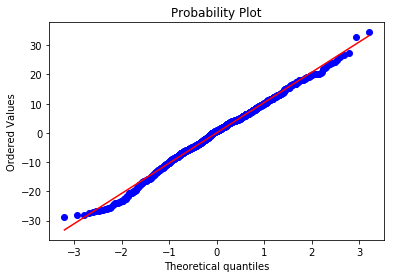

In [10]:
reg.fit(x, y)
probplot(y - reg.predict(x), plot=plt)
plt.show()

### Residual Plot

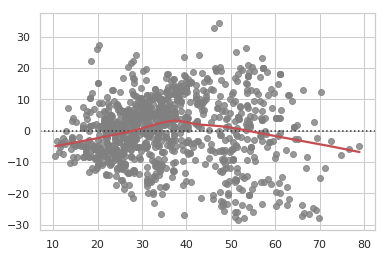

In [11]:
sns.set(style="whitegrid")
sns.residplot(reg.predict(x), y, lowess=True, color='grey', line_kws={'color': 'r'})

### VIFs

In [12]:
cor = x.corr().values
inv = np.linalg.inv(cor)
vifs = np.diagonal(inv)
print(tabulate(zip(x.columns, vifs)))

------  -------
Cement  7.48894
Slag    7.27696
FlyAsh  6.17063
Water   7.00396
SPlast  2.96378
CAgg    5.07462
FAgg    7.00508
Age     1.11837
------  -------
